# Churn Reduction

In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform


Using TensorFlow backend.


In [2]:
#Set working directory
os.chdir("C:/Users/vrush_000/Desktop/Data science/Project/Main Project/Customer_churn")

In [3]:
#check working directory
os.getcwd()

'C:\\Users\\vrush_000\\Desktop\\Data science\\Project\\Main Project\\Customer_churn'

In [4]:
#Load data
churn_train = pd.read_csv("Train_data.csv")
churn_test = pd.read_csv("Test_data.csv")

In [5]:
#Create a new variable in train and test data to find and reseparate them after merging 
churn_train["istrainset"] = True
churn_test["istrainset"] = False


In [6]:
#create a new combined dataset
churn_test.colunmns = churn_train.columns
churn_full = pd.concat([churn_train, churn_test])



C:\Users\vrush_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [7]:
churn_full.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn,istrainset
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,True
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,True
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,True
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,True
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,True


In [8]:
##Expore the dataset
#dimension of dataset
churn_full.shape

(5000, 22)

In [9]:
#Replace spaces in column names with nothing
churn_full.columns = churn_full.columns.str.replace(' ', '')

In [10]:
#structure of data
churn_full.dtypes

state                          object
accountlength                   int64
areacode                        int64
phonenumber                    object
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
Churn                          object
istrainset                       bool
dtype: object

In [11]:
#Distribution of unique values in a categorical variable
churn_full["areacode"].value_counts()


415    2495
408    1259
510    1246
Name: areacode, dtype: int64

In [12]:
#checking for missing values
churn_full.isnull().sum()
#As our data does not contain any missing value, no need to do missing value analysis


state                         0
accountlength                 0
areacode                      0
phonenumber                   0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
Churn                         0
istrainset                    0
dtype: int64

In [13]:
## Univariate Analysis and Variable Consolidation
#conversion of datatype of variable area.code to factor
churn_full["areacode"]= churn_full["areacode"].astype('object')



In [14]:
#as feature "phone.number" is unique for each row and it does not have impact on our target variable "Churn", 
#better to drop this variable
del churn_full["phonenumber"]

In [15]:
##Exploratory data Analysis
#separate combine data
churn_train = churn_full.loc[churn_full['istrainset'] == True]
churn_test = churn_full.loc[churn_full["istrainset"] == False]

# Data Visualization

In [16]:
#churn and non churn customer percentage
churn = churn_train["Churn"].value_counts().to_frame().reset_index().rename(columns={"index":"Churn","Churn":"count"})
churn["percentage"]=0
for i in range(len(churn)):
    churn["percentage"].iloc[i] = (churn["count"].iloc[i]/len(churn_train.index)*100)

C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


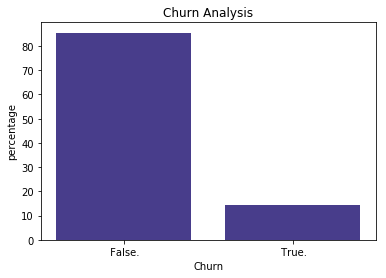

In [17]:
#visualising churn percentage
plt.bar(churn["Churn"],churn["percentage"],color = "darkslateBlue")
plt.xlabel("Churn")
plt.ylabel("percentage")
plt.title("Churn Analysis")
plt.show()

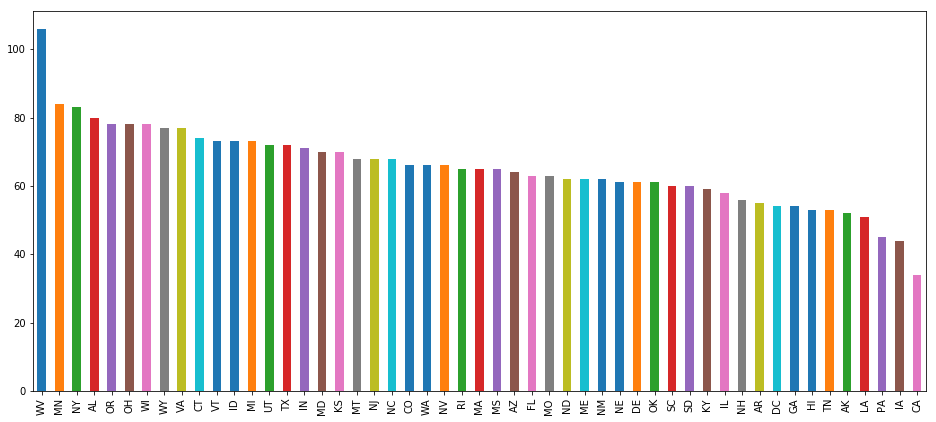

In [18]:
#visualizing distribution of "state" variable
churn_train['state'].value_counts().plot(kind='bar',figsize = (16,7))

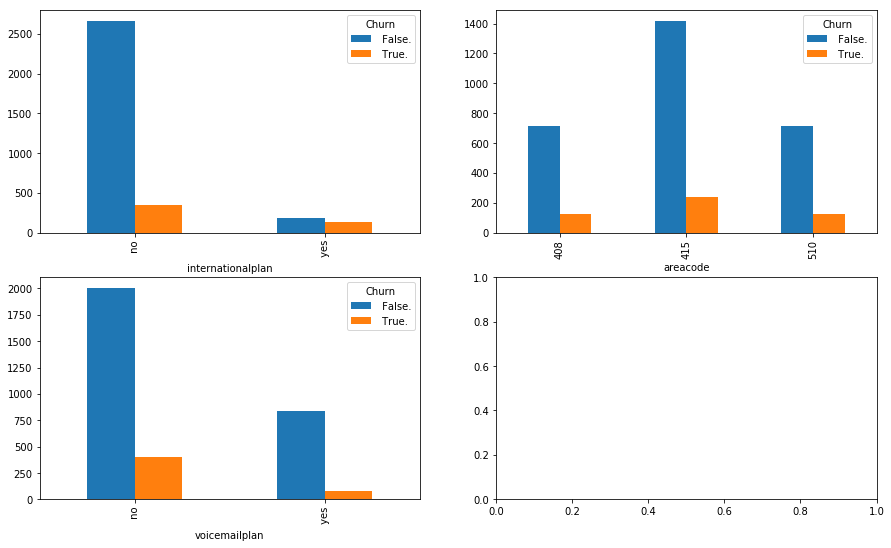

In [19]:
#visuaization of relation between each categorical variable with customers' churn behaviour
fig, axes = plt.subplots(nrows=2, ncols=2,figsize = (15,9))
churn_train.groupby(['internationalplan','Churn']).size().unstack().plot(kind = 'bar',ax = axes[0,0] )

churn_train.groupby(['areacode','Churn']).size().unstack().plot(kind = 'bar',ax = axes[0,1])

churn_train.groupby(['voicemailplan','Churn']).size().unstack().plot(kind = 'bar',ax = axes[1,0])


(array([ 697., 1181.,  759.,  429.,  166.,   66.,   22.,    9.,    2.,
           2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

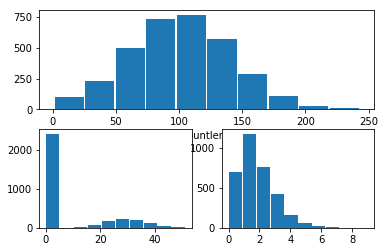

In [20]:
#Distribution of continous variable
plt.subplot(211)
plt.hist(churn_train["accountlength"],rwidth = 0.95)
plt.xlabel("accountlength")
plt.subplot(223)
plt.hist(churn_train["numbervmailmessages"],rwidth = 0.95)
plt.subplot(224)
plt.hist(churn_train["numbercustomerservicecalls"],rwidth = 0.95)



(array([ 20.,  32., 158., 449., 820., 968., 606., 219.,  52.,   9.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

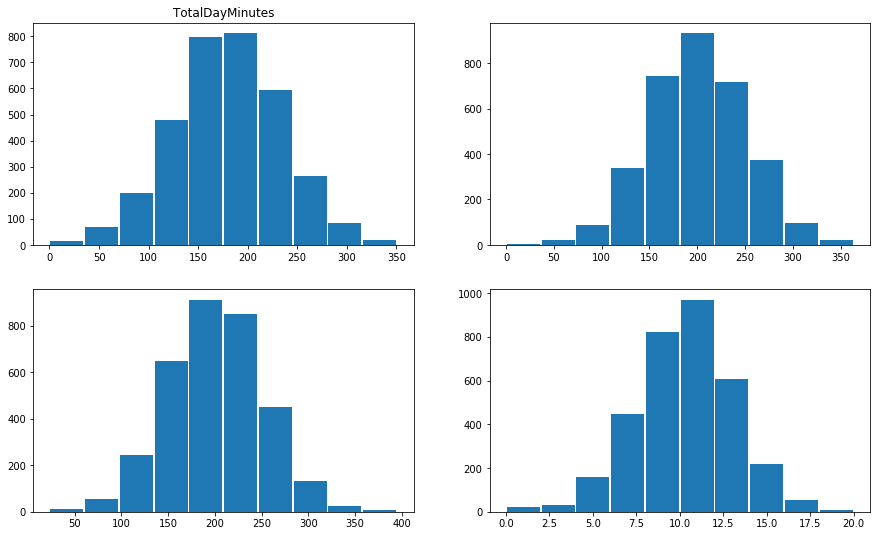

In [21]:
fig,axs = plt.subplots(2,2,figsize = (15,9))

axs[0,0].hist(churn_train["totaldayminutes"],rwidth = 0.95)
axs[0,0].set_title('TotalDayMinutes')

axs[0,1].hist(churn_train["totaleveminutes"],rwidth = 0.95)

axs[1,0].hist(churn_train["totalnightminutes"],rwidth = 0.95)

axs[1,1].hist(churn_train["totalintlminutes"],rwidth = 0.95)

(array([ 20.,  32., 158., 449., 820., 968., 627., 198.,  52.,   9.]),
 array([0.  , 0.54, 1.08, 1.62, 2.16, 2.7 , 3.24, 3.78, 4.32, 4.86, 5.4 ]),
 <a list of 10 Patch objects>)

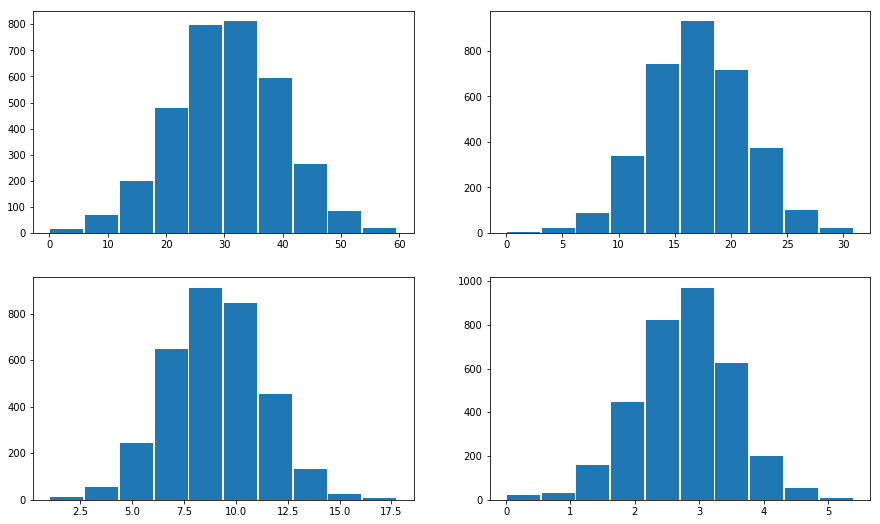

In [22]:
#Distribution of continouus variable
fig,axs = plt.subplots(2,2,figsize = (15,9))

axs[0,0].hist(churn_train["totaldaycharge"],rwidth = 0.95)

axs[0,1].hist(churn_train["totalevecharge"],rwidth = 0.95)

axs[1,0].hist(churn_train["totalnightcharge"],rwidth = 0.95)

axs[1,1].hist(churn_train["totalintlcharge"],rwidth = 0.95)

(array([ 178., 1157., 1091.,  554.,  225.,   78.,   29.,   13.,    3.,
           5.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

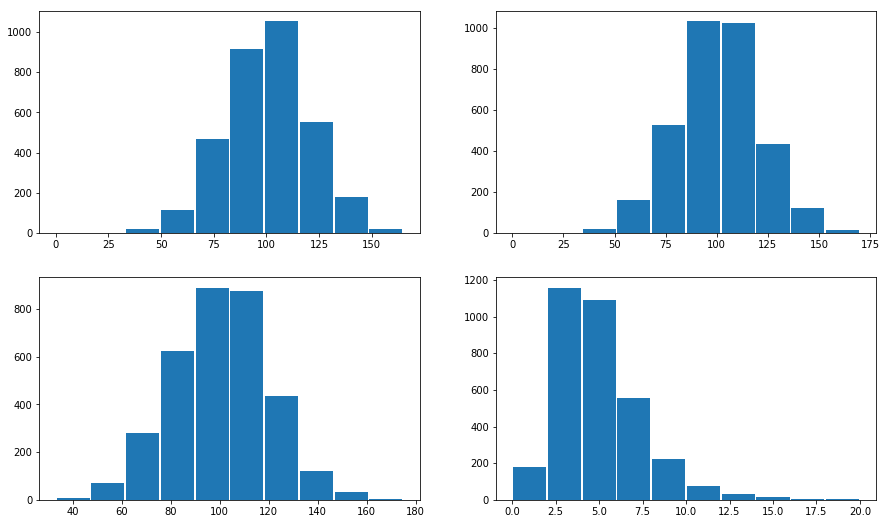

In [23]:
fig,axs = plt.subplots(2,2,figsize = (15,9))

axs[0,0].hist(churn_train["totaldaycalls"],rwidth = 0.95)

axs[0,1].hist(churn_train["totalevecalls"],rwidth = 0.95)

axs[1,0].hist(churn_train["totalnightcalls"],rwidth = 0.95)

axs[1,1].hist(churn_train["totalintlcalls"],rwidth = 0.95)

In [24]:
#Assigning levels to the categories
lis = []
for i in range(0, churn_full.shape[1]):
    #print(i)
    if(churn_full.iloc[:,i].dtypes == 'object'):
        churn_full.iloc[:,i] = pd.Categorical(churn_full.iloc[:,i])
        #print(churn_full[[i]])
        churn_full.iloc[:,i] = churn_full.iloc[:,i].cat.codes 
        churn_full.iloc[:,i] = churn_full.iloc[:,i].astype('object')
        
        lis.append(churn_full.columns[i])
        

In [25]:
churn_full.head()

,state,accountlength,areacode,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,...,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,Churn,istrainset
0,16,128,1,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,True
1,35,107,1,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,True
2,31,137,1,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,True
3,35,84,0,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,True
4,36,75,1,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,True


In [26]:
#Convert into proper datatypes
for i in lis:
    churn_full.loc[:,i] = churn_full.loc[:,i].astype('object')

In [27]:
#separate combine data
churn_train = churn_full.loc[churn_full['istrainset'] == True]
churn_test = churn_full.loc[churn_full["istrainset"] == False]

## Outlier Analysis

In [28]:
#save a copy dataframe with outlier
with_outlier = churn_train

In [29]:
#Select names of continous variable
cnames = list(churn_train.select_dtypes(include = [np.number]))

In [30]:
cnames

['accountlength',
 'numbervmailmessages',
 'totaldayminutes',
 'totaldaycalls',
 'totaldaycharge',
 'totaleveminutes',
 'totalevecalls',
 'totalevecharge',
 'totalnightminutes',
 'totalnightcalls',
 'totalnightcharge',
 'totalintlminutes',
 'totalintlcalls',
 'totalintlcharge',
 'numbercustomerservicecalls']

{'whiskers': [<matplotlib.lines.Line2D at 0xd0b96cf470>,
 'caps': [<matplotlib.lines.Line2D at 0xd0b96cfd30>,
 'boxes': [<matplotlib.lines.Line2D at 0xd0b96cf320>],
 'medians': [<matplotlib.lines.Line2D at 0xd0b96d75c0>],
 'fliers': [<matplotlib.lines.Line2D at 0xd0b96d79e8>],
 'means': []}

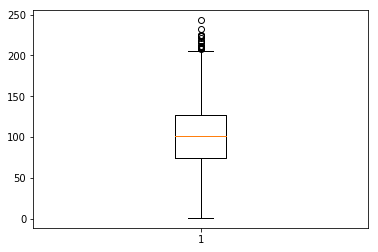

In [31]:
# #Plot boxplot to visualize Outliers
%matplotlib inline
plt.boxplot(churn_train['accountlength'])

In [32]:
# #Detect and delete outliers from data
for i in cnames:
    print(i)
    q75, q25 = np.percentile(churn_train.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
churn_train = churn_train.drop(churn_train[churn_train.loc[:,i] < min].index)
churn_train = churn_train.drop(churn_train[churn_train.loc[:,i] > max].index)

accountlength
-5.5
206.5
numbervmailmessages
-30.0
50.0
totaldayminutes
34.64999999999996
325.45000000000005
totaldaycalls
46.5
154.5
totaldaycharge
5.890000000000001
55.33
totaleveminutes
63.54999999999997
338.35
totalevecalls
46.5
154.5
totalevecharge
5.4
28.759999999999998
totalnightminutes
64.54999999999998
337.75
totalnightcalls
48.0
152.0
totalnightcharge
2.914999999999999
15.195
totalintlminutes
3.1000000000000005
17.5
totalintlcalls
-1.5
10.5
totalintlcharge
0.8449999999999995
4.7250000000000005
numbercustomerservicecalls
-0.5
3.5


In [33]:
#save a copy of dataframe without outlier
without_outlier = churn_train

In [34]:
without_outlier.head()

,state,accountlength,areacode,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,...,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls,Churn,istrainset
0,16,128,1,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,True
1,35,107,1,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,True
2,31,137,1,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,True
3,35,84,0,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,True
4,36,75,1,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,True


Text(0.5,1,'without outlier')

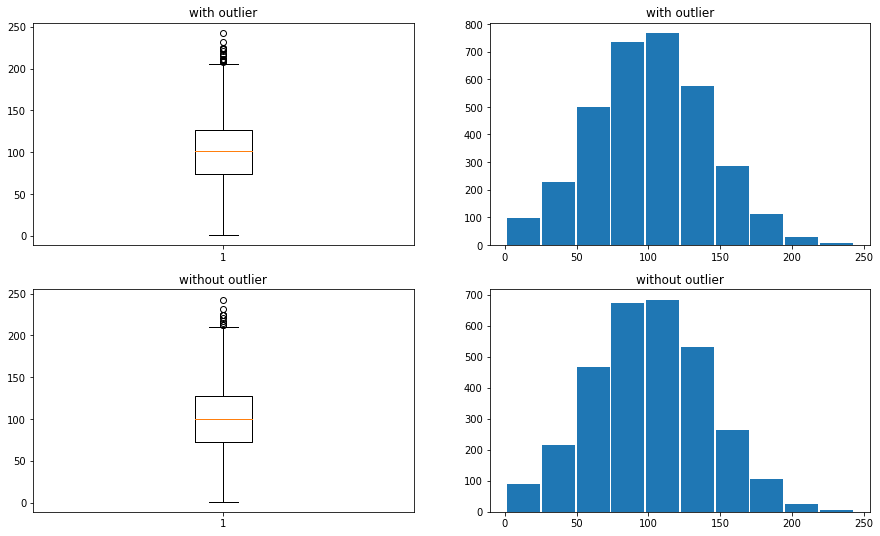

In [35]:
#visualizing before and after effect of outlier on contionous variable
fig,axs = plt.subplots(2,2,figsize = (15,9))

axs[0,0].boxplot(with_outlier["accountlength"])
axs[0,0].set_title("with outlier")

axs[1,0].boxplot(without_outlier["accountlength"])
axs[1,0].set_title("without outlier")

axs[0,1].hist(with_outlier["accountlength"],rwidth = 0.95)
axs[0,1].set_title("with outlier")

axs[1,1].hist(without_outlier["accountlength"],rwidth = 0.95)
axs[1,1].set_title("without outlier")

## Feature Selection

In [36]:
##Correlation analysis
#Correlation plot
df_corr = churn_train.loc[:,cnames]

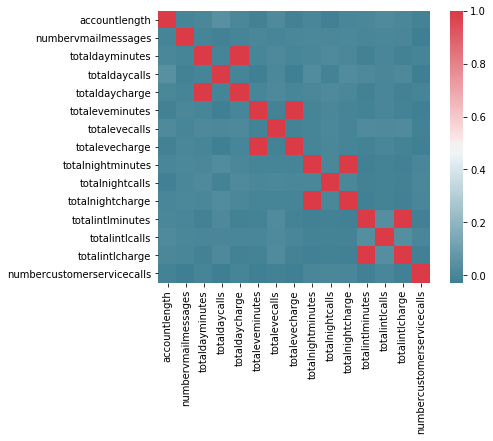

In [37]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))#figsize=(height,width)

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [38]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["state","areacode","voicemailplan","internationalplan"]

In [39]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(churn_train['Churn'], churn_train[i]))
    print(p)

state
0.009594705365683513
areacode
0.7344072016637799
voicemailplan
8.22509244176519e-09
internationalplan
5.260237906877538e-60


In [40]:
#Dimension reduction
churn_train = churn_train.drop(["totaldaycharge","totalevecharge","totalnightcharge","totalintlcharge","areacode"], axis=1)
churn_test = churn_test.drop(["totaldaycharge","totalevecharge","totalnightcharge","totalintlcharge","areacode"], axis=1)


In [41]:
churn_train.shape

(3066, 16)

## Feature Scaling

(array([ 19.,  31.,  28.,  47.,  65.,  85.,  90., 133., 182., 175., 193.,
        218., 238., 209., 212., 206., 212., 175., 116., 119.,  76.,  81.,
         43.,  40.,  31.,  16.,   9.,   8.,   2.,   5.,   1.,   1.]),
 array([  1.    ,   8.5625,  16.125 ,  23.6875,  31.25  ,  38.8125,
         46.375 ,  53.9375,  61.5   ,  69.0625,  76.625 ,  84.1875,
         91.75  ,  99.3125, 106.875 , 114.4375, 122.    , 129.5625,
        137.125 , 144.6875, 152.25  , 159.8125, 167.375 , 174.9375,
        182.5   , 190.0625, 197.625 , 205.1875, 212.75  , 220.3125,
        227.875 , 235.4375, 243.    ]),
 <a list of 32 Patch objects>)

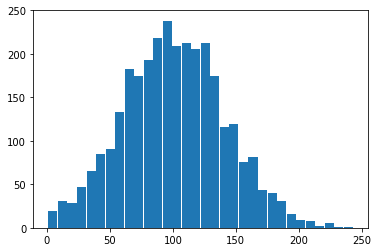

In [42]:
#Normality check
%matplotlib inline  
plt.hist(churn_train['accountlength'], bins='auto',rwidth = 0.95)

In [43]:
cnames = list(churn_train.select_dtypes(include = [np.number]))

In [44]:
cnames

['accountlength',
 'numbervmailmessages',
 'totaldayminutes',
 'totaldaycalls',
 'totaleveminutes',
 'totalevecalls',
 'totalnightminutes',
 'totalnightcalls',
 'totalintlminutes',
 'totalintlcalls',
 'numbercustomerservicecalls']

In [45]:
churn_train.head()

,state,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls,Churn,istrainset
0,16,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,True
1,35,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,True
2,31,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,True
3,35,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,True
4,36,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,True


In [46]:
#Nomalisation for train data
for i in cnames:
    print(i)
    churn_train[i] = (churn_train[i] - np.min(churn_train[i]))/(np.max(churn_train[i]) - np.min(churn_train[i]))

accountlength
numbervmailmessages
totaldayminutes
totaldaycalls
totaleveminutes
totalevecalls
totalnightminutes
totalnightcalls
totalintlminutes
totalintlcalls
numbercustomerservicecalls


In [47]:
#Normalization for test data
for i in cnames:
    print(i)
    churn_test[i] = (churn_test[i] - np.min(churn_test[i]))/(np.max(churn_test[i]) - np.min(churn_test[i]))

accountlength
numbervmailmessages
totaldayminutes
totaldaycalls
totaleveminutes
totalevecalls
totalnightminutes
totalnightcalls
totalintlminutes
totalintlcalls
numbercustomerservicecalls


In [48]:
churn_train.head()

,state,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls,Churn,istrainset
0,16,0.524793,0,1,0.490196,0.755701,0.674847,0.545605,0.582353,0.595750,0.408451,0.500,0.15,0.333333,0,True
1,35,0.438017,0,1,0.509804,0.460661,0.754601,0.540354,0.605882,0.621840,0.492958,0.685,0.15,0.333333,0,True
2,31,0.561983,0,0,0.000000,0.693843,0.699387,0.334992,0.647059,0.374933,0.500000,0.610,0.25,0.000000,0,True
3,35,0.342975,1,0,0.000000,0.853478,0.435583,0.171089,0.517647,0.467187,0.394366,0.330,0.35,0.666667,0,True
4,36,0.305785,1,0,0.000000,0.475200,0.693252,0.409895,0.717647,0.440290,0.619718,0.505,0.15,1.000000,0,True


In [49]:
#summary of variable
churn_train['accountlength'].describe()

count    3066.000000
mean        0.413184
std         0.165806
min         0.000000
25%         0.297521
50%         0.409091
75%         0.524793
max         1.000000
Name: accountlength, dtype: float64

## Model Development

In [50]:
#Import Libraries for decision tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import accuracy_score


In [51]:
#combine the data
churn_full = pd.concat([churn_train,churn_test])

In [52]:
churn_full.shape

(4733, 16)

In [53]:
#replace target categories with Yes or No
churn_full['Churn'] = churn_full['Churn'].replace(0, 'No')
churn_full['Churn'] = churn_full['Churn'].replace(1, 'Yes')

In [54]:
#separate combine data
churn_train = churn_full.loc[churn_full['istrainset'] == True]
churn_test = churn_full.loc[churn_full["istrainset"] == False]

In [55]:
#delete boolean variable as it is of no use
del churn_train["istrainset"]
del churn_test["istrainset"]

In [56]:
churn_train.shape

(3066, 15)

In [57]:
#Divide data into train and test
X = churn_train.values[:, 0:14]
Y = churn_train.values[:,14]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

## Decision tree

In [58]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [59]:
C50_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
#predict new test cases
C50_predictions = C50_model.predict(X_test)

In [61]:
from graphviz import Source
from sklearn import tree


In [62]:
#Create dot file to visualise tree  #http://webgraphviz.com/
dotfile = open("p.dot", 'w')

df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = churn_train.columns[0:14])

In [63]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [64]:
#check accuracy of model
#((TP+TN)*100)/(TP+TN+FP+FN)
#False Negative rate 
#(FN*100)/(FN+TP)
#Sensitivity
#(TP*100)/(TP+FN)
#Specificity
(TN*100)/(TN+FP)


95.58011049723757

In [65]:
#Result
#Accuracy = 92.99
#FNR = 40
#Sensiivity = 60
#Specificity = 96.90

## Random Forest

In [66]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [67]:
RF_model = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)

In [68]:
RF_Predictions = RF_model.predict(X_test)

In [69]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [70]:
#check accuracy of model
#((TP+TN)*100)/(TP+TN+FP+FN)
#False Negative rate 
#(FN*100)/(FN+TP)
#Sensitivity
#(TP*100)/(TP+FN)
#Specificity
(TN*100)/(TN+FP)

100.0

In [71]:
##Result
#Accuracy = 95.27
#FNR = 41.53
#Sensiivity = 58.46
#Specificity = 99.81 

In [72]:
churn_train.shape

(3066, 15)

## Logistic Regression

In [73]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
churn_train['Churn'] = churn_train["Churn"].replace('No', 0)
churn_train['Churn'] = churn_train["Churn"].replace('Yes', 1)

C:\Users\vrush_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vrush_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [74]:
churn_train.head()

,state,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls,Churn
0,16,0.524793,0,1,0.490196,0.755701,0.674847,0.545605,0.582353,0.595750,0.408451,0.500,0.15,0.333333,0
1,35,0.438017,0,1,0.509804,0.460661,0.754601,0.540354,0.605882,0.621840,0.492958,0.685,0.15,0.333333,0
2,31,0.561983,0,0,0.000000,0.693843,0.699387,0.334992,0.647059,0.374933,0.500000,0.610,0.25,0.000000,0
3,35,0.342975,1,0,0.000000,0.853478,0.435583,0.171089,0.517647,0.467187,0.394366,0.330,0.35,0.666667,0
4,36,0.305785,1,0,0.000000,0.475200,0.693252,0.409895,0.717647,0.440290,0.619718,0.505,0.15,1.000000,0


In [75]:
#Create logistic data. Save target variable first
churn_train_logit = pd.DataFrame(churn_train['Churn'])

In [76]:
#Add continous variables
churn_train_logit = churn_train_logit.join(churn_train[cnames])

In [77]:
churn_train_logit.head()

,Churn,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,totalintlcalls,numbercustomerservicecalls
0,0,0.524793,0.490196,0.755701,0.674847,0.545605,0.582353,0.595750,0.408451,0.500,0.15,0.333333
1,0,0.438017,0.509804,0.460661,0.754601,0.540354,0.605882,0.621840,0.492958,0.685,0.15,0.333333
2,0,0.561983,0.000000,0.693843,0.699387,0.334992,0.647059,0.374933,0.500000,0.610,0.25,0.000000
3,0,0.342975,0.000000,0.853478,0.435583,0.171089,0.517647,0.467187,0.394366,0.330,0.35,0.666667
4,0,0.305785,0.000000,0.475200,0.693252,0.409895,0.717647,0.440290,0.619718,0.505,0.15,1.000000


In [78]:
##Create dummies for categorical variables
cat_names = ["state","voicemailplan","internationalplan"]

for i in cat_names:
    temp = pd.get_dummies(churn_train[i], prefix = i)
    churn_train_logit = churn_train_logit.join(temp)

In [79]:
churn_train_logit.shape

(3066, 67)

In [80]:
#splitting into train and test dataset
Sample_Index = np.random.rand(len(churn_train_logit)) < 0.8

train = churn_train_logit[Sample_Index]
test = churn_train_logit[~Sample_Index]

In [81]:
train.head()

,Churn,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaleveminutes,totalevecalls,totalnightminutes,totalnightcalls,totalintlminutes,...,state_45,state_46,state_47,state_48,state_49,state_50,voicemailplan_0,voicemailplan_1,internationalplan_0,internationalplan_1
1,0,0.438017,0.509804,0.460661,0.754601,0.540354,0.605882,0.621840,0.492958,0.685,...,0,0,0,0,0,0,0,1,1,0
2,0,0.561983,0.000000,0.693843,0.699387,0.334992,0.647059,0.374933,0.500000,0.610,...,0,0,0,0,0,0,1,0,1,0
4,0,0.305785,0.000000,0.475200,0.693252,0.409895,0.717647,0.440290,0.619718,0.505,...,0,0,0,0,0,0,1,0,0,1
6,0,0.495868,0.470588,0.622007,0.539877,0.963239,0.635294,0.509414,0.598592,0.375,...,0,0,0,0,0,0,0,1,1,0
8,0,0.479339,0.000000,0.525941,0.595092,0.971808,0.470588,0.518020,0.401408,0.435,...,0,0,0,0,0,0,1,0,1,0


In [82]:
#select column indexes for independent variables
train_cols = train.columns[1:]

In [83]:
train_cols

Index(['accountlength', 'numbervmailmessages', 'totaldayminutes',
       'totaldaycalls', 'totaleveminutes', 'totalevecalls',
       'totalnightminutes', 'totalnightcalls', 'totalintlminutes',
       'totalintlcalls', 'numbercustomerservicecalls', 'state_0', 'state_1',
       'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'state_7',
       'state_8', 'state_9', 'state_10', 'state_11', 'state_12', 'state_13',
       'state_14', 'state_15', 'state_16', 'state_17', 'state_18', 'state_19',
       'state_20', 'state_21', 'state_22', 'state_23', 'state_24', 'state_25',
       'state_26', 'state_27', 'state_28', 'state_29', 'state_30', 'state_31',
       'state_32', 'state_33', 'state_34', 'state_35', 'state_36', 'state_37',
       'state_38', 'state_39', 'state_40', 'state_41', 'state_42', 'state_43',
       'state_44', 'state_45', 'state_46', 'state_47', 'state_48', 'state_49',
       'state_50', 'voicemailplan_0', 'voicemailplan_1', 'internationalplan_0',
       'internationalplan_

In [84]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['Churn'], train[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.235644
         Iterations 11


In [85]:
logit.summary()

C:\Users\vrush_000\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\vrush_000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\vrush_000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\vrush_000\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2451
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           63
Date:                Mon, 18 Mar 2019   Pseudo R-squ.:                  0.3504
Time:                        12:23:07   Log-Likelihood:                -577.56
converged:                       True   LL-Null:                       -889.08
                                        LLR p-value:                 4.342e-93
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
accountlength                  0.6899      0.475      1.453      0.146      -0.241       1.621
numbervmailmessages            2.6887      1.324      2.030      0.042       0.093       5.284
totaldayminutes                8.3634      0.598     13.990      0.000       7.192       9.535
totaldaycalls                  0.6806      0.638      1.067      0.286      -0.569       1.931
totaleveminutes                5.1086      0.602      8.487      0.000       3.929       6.288
totalevecalls                 -0.1773      0.686     -0.259      0.796      -1.521       1.167
totalnightminutes              2.5247      0.594      4.253      0.000       1.361       3.688
totalnightcalls                0.1963      0.572      0.343      0.731      -0.924       1.317
totalintlminutes               2.3937      0.586      4.083      0.000       1.245       3.543
totalintlcalls                -1.5556      0.653     -2.383      0.017      -2.835      -0.276
numbercustomerservicecalls    -0.1639      0.235     -0.697      0.486      -0.625       0.297
state_0                       -1.9935   5.88e+06  -3.39e-07      1.000   -1.15e+07    1.15e+07
state_1                       -1.3264   5.88e+06  -2.25e-07      1.000   -1.15e+07    1.15e+07
state_2                       -1.0744   5.88e+06  -1.83e-07      1.000   -1.15e+07    1.15e+07
state_3                       -1.0761   5.88e+06  -1.83e-07      1.000   -1.15e+07    1.15e+07
state_4                        0.1097   5.88e+06   1.86e-08      1.000   -1.15e+07    1.15e+07
state_5                       -0.2599   5.88e+06  -4.42e-08      1.000   -1.15e+07    1.15e+07
state_6                       -0.2805   5.88e+06  -4.77e-08      1.000   -1.15e+07    1.15e+07
state_7                       -0.2233   5.88e+06   -3.8e-08      1.000   -1.15e+07    1.15e+07
state_8                       -0.9040   5.88e+06  -1.54e-07      1.000   -1.15e+07    1.15e+07
state_9                       -0.4705   5.88e+06     -8e-08      1.000   -1.15e+07    1.15e+07
state_10                      -0.5904   5.88e+06     -1e-07      1.000   -1.15e+07    1.15e+07
state_11                      -1.6823   5.88e+06  -2.86e-07      1.000   -1.15e+07    1.15e+07
state_12                      -1.1715   5.88e+06  -1.99e-07      1.000   -1.15e+07    1.15e+07
state_13                      -0.4477   5.88e+06  -7.61e-08      1.000   -1.15e+07    1.15e+07
state_14                      -1.5919   5.88e+06  -2.71e-07      1.000   -1.15e+07    1.15e+07
state_15                      -1.0232   5.88e+06  -1.74e-07      1.000   -1.15e+07    1.15e+07
state_16                       0.1699   5.88e+06   2.89e-08      1.000   -1.15e+07    1.15e+07
state_17                      -0.9193   5.88e+06  -1.56e-07      1.000   -1.15e+07    1.15e+07
state_18                      -0.3416   5.88e+06  -5.81e-08      1.000   -1.15e+07    1.15e+07
state_19                      -0.0896   5.88e+06  -1.52e-08      1.000   -1.15e+07    1.15e+07
state_20   

In [86]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\vrush_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vrush_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\vrush_000\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [87]:
#Build confusion matrix
CM = pd.crosstab(test['Churn'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]



In [88]:
#check accuracy of model
((TP+TN)*100)/(TP+TN+FP+FN)
#False Negative rate 
#(FN*100)/(FN+TP)
#Sensitivity
#(TP*100)/(TP+FN)
#Specificity
#(TN*100)/(TN+FP)

92.6829268292683

In [89]:
##Result
#Accuracy = 91.14
#FNR = 70.31
#Sensiivity = 29.68
#Specificity = 98.19

## KNN Classifier

In [90]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)

In [91]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [92]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


In [93]:
#check accuracy of model
#((TP+TN)*100)/(TP+TN+FP+FN)
#False Negative rate 
#(FN*100)/(FN+TP)
#Sensitivity
(TP*100)/(TP+FN)
#Specificity
#(TN*100)/(TN+FP)

12.67605633802817

In [94]:
##Result
#Accuracy = 88.27
#FNR = 92.06
#Sensiivity = 7.93
#Specificity = 97.45

## Naive Bayes

In [95]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [96]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [97]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [98]:
#check accuracy of model
((TP+TN)*100)/(TP+TN+FP+FN)
#False Negative rate 
#(FN*100)/(FN+TP)
#Sensitivity
#(TP*100)/(TP+FN)
#Specificity
#(TN*100)/(TN+FP)

89.08794788273616

In [99]:
##Result
#Accuracy = 88.76
#FNR = 63.49
#Sensiivity = 36.50
#Specificity = 94.73

### As the decision tree gives higher value of accuracy, sensitivity and specificity and low value of FNR, we are selecting decision tree as our final model to predict for test cases.

## Prediction on test data

In [101]:
#Divide data into train and test
X_train = churn_train.drop("Churn",axis=1)
y_train = churn_train["Churn"]
X_test = churn_test.drop("Churn",axis=1)


## Decision tree

In [102]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

In [103]:
#predict new test cases
C50_predictions = C50_model.predict(X_test)

In [104]:
C50_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Preparing submission file

In [106]:
output = churn_test["state"]

In [107]:
output = pd.DataFrame(output)

In [108]:
output["Churn"] = C50_predictions

In [109]:
output.head()

,state,Churn
0,11,0
1,26,0
2,35,0
3,32,0
4,40,0


In [110]:
output["Churn"] = output["Churn"].replace(0,"No")
output["Churn"] = output["Churn"].replace(1,"Yes")

In [111]:
output.head()

,state,Churn
0,11,No
1,26,No
2,35,No
3,32,No
4,40,No


In [112]:
#save prediction into the sytem
output.to_csv("Python_Prediction_test_data.csv",index = False)